# **Installing and Importing Libs**

In [2]:
!pip install pandas
import pandas as pd

# to access google colab`s files
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

# Optional for cleaner style
sns.set(style="whitegrid")

# Show performance metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# **Uploading the dataset of the game (*Chess*)**

In [3]:
uploaded = files.upload()

Saving games.csv to games.csv


# **Loading the Dataset of the game**

In [4]:
# Load the dataset
df = pd.read_csv('games.csv')

# Display the first 5 rows
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# **Getting info about the Dataset/statistics/show columns...etc**

In [5]:
# Get info about the dataset
df.info()

# Show basic statistics
df.describe()

# Show column names
df.columns

# Check for missing values
df.isnull().sum()

df.head()  # First few rows

df.tail()  # Last few rows

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB
id: 19113 

# **analyzing and visualizing Dataset**

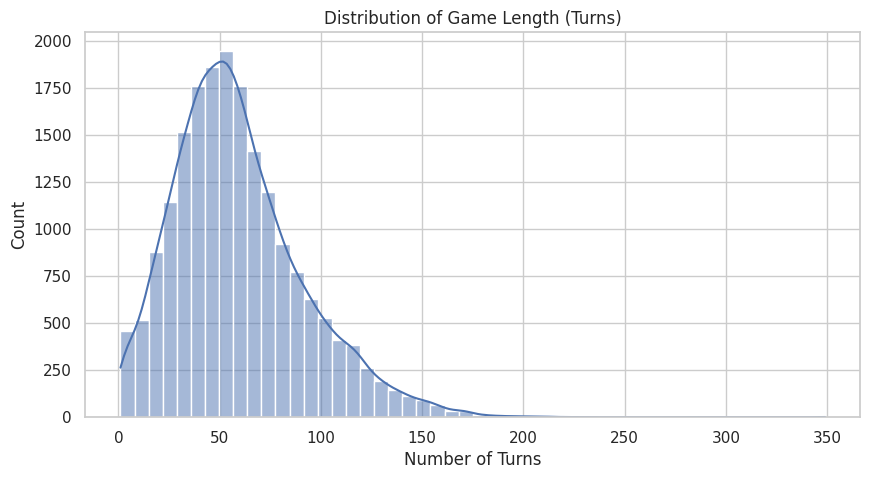

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['turns'], bins=50, kde=True)
plt.title('Distribution of Game Length (Turns)')
plt.xlabel('Number of Turns')
plt.ylabel('Count')
plt.show()

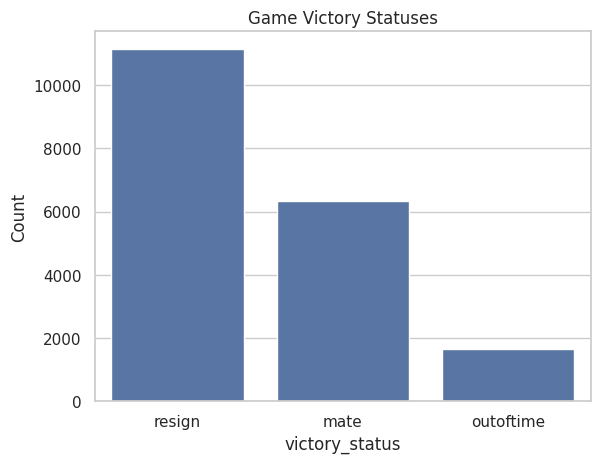

In [15]:
sns.countplot(data=df, x='victory_status', order=df['victory_status'].value_counts().index)
plt.title('Game Victory Statuses')
plt.ylabel('Count')
plt.show()

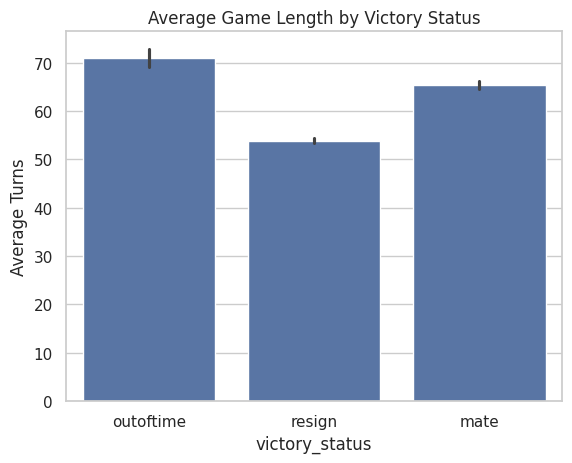

In [16]:
sns.barplot(data=df, x='victory_status', y='turns')
plt.title('Average Game Length by Victory Status')
plt.ylabel('Average Turns')
plt.show()

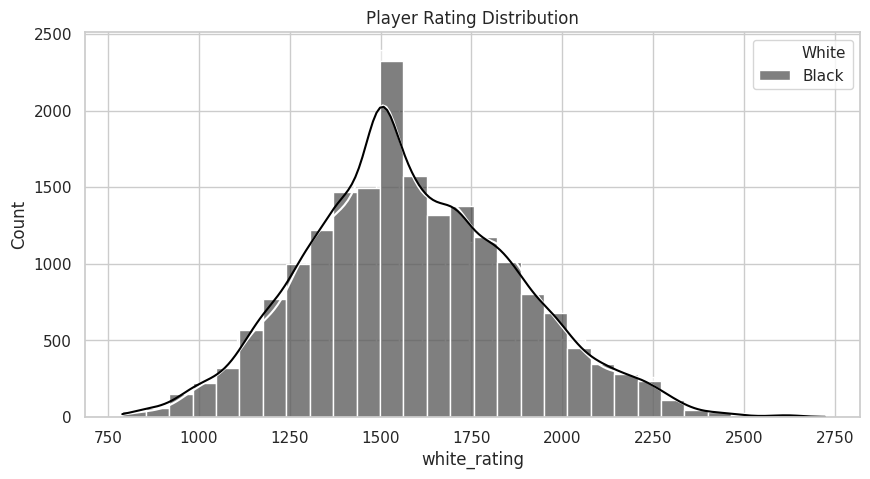

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['white_rating'], color='white', label='White', kde=True, bins=30)
sns.histplot(df['black_rating'], color='black', label='Black', kde=True, bins=30)
plt.title('Player Rating Distribution')
plt.legend()
plt.show()

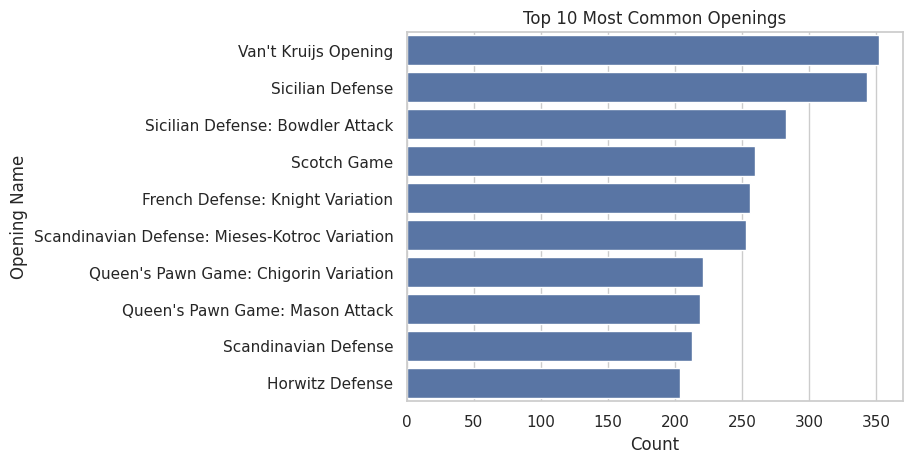

In [18]:
top_openings = df['opening_name'].value_counts().nlargest(10)
sns.barplot(y=top_openings.index, x=top_openings.values)
plt.title('Top 10 Most Common Openings')
plt.xlabel('Count')
plt.ylabel('Opening Name')
plt.show()

# **Creating Winner prediction model**

In [6]:

df = pd.read_csv('games.csv')  # Just use the file name

# Drop games where the result is not 'white' or 'black' (some might be 'draw')
df = df[df['winner'].isin(['white', 'black'])]

# Select features for training
features = ['white_rating', 'black_rating', 'turns', 'opening_ply', 'rated']

# Convert boolean 'rated' column to integers
df['rated'] = df['rated'].astype(int)

X = df[features]

# Encode the target variable ('white' -> 0, 'black' -> 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['winner'])  # 0 = white, 1 = black


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

       white       0.69      0.69      0.69      1832
       black       0.71      0.72      0.71      1990

    accuracy                           0.70      3822
   macro avg       0.70      0.70      0.70      3822
weighted avg       0.70      0.70      0.70      3822



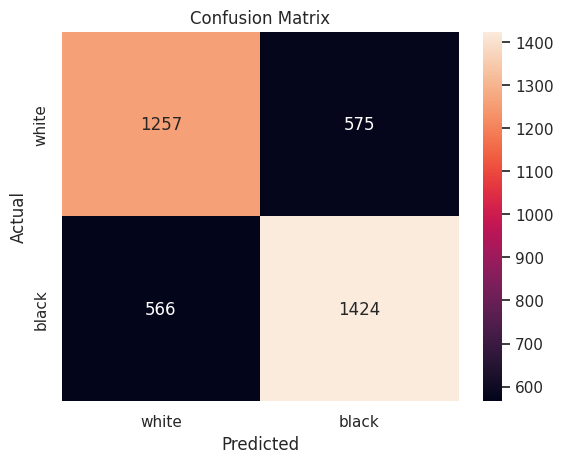

In [9]:
y_pred = model.predict(X_test)

# Print performance
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['white', 'black']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['white', 'black'], yticklabels=['white', 'black'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [10]:
# Create and train the decision tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Decision Tree Classification Report:

              precision    recall  f1-score   support

       white       0.60      0.65      0.63      1832
       black       0.66      0.61      0.63      1990

    accuracy                           0.63      3822
   macro avg       0.63      0.63      0.63      3822
weighted avg       0.63      0.63      0.63      3822



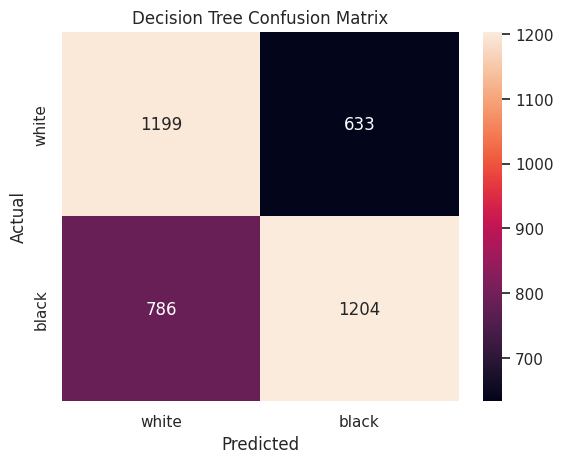

In [11]:
# Predict on test set
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_tree, target_names=['white', 'black']))

# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', xticklabels=['white', 'black'], yticklabels=['white', 'black'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

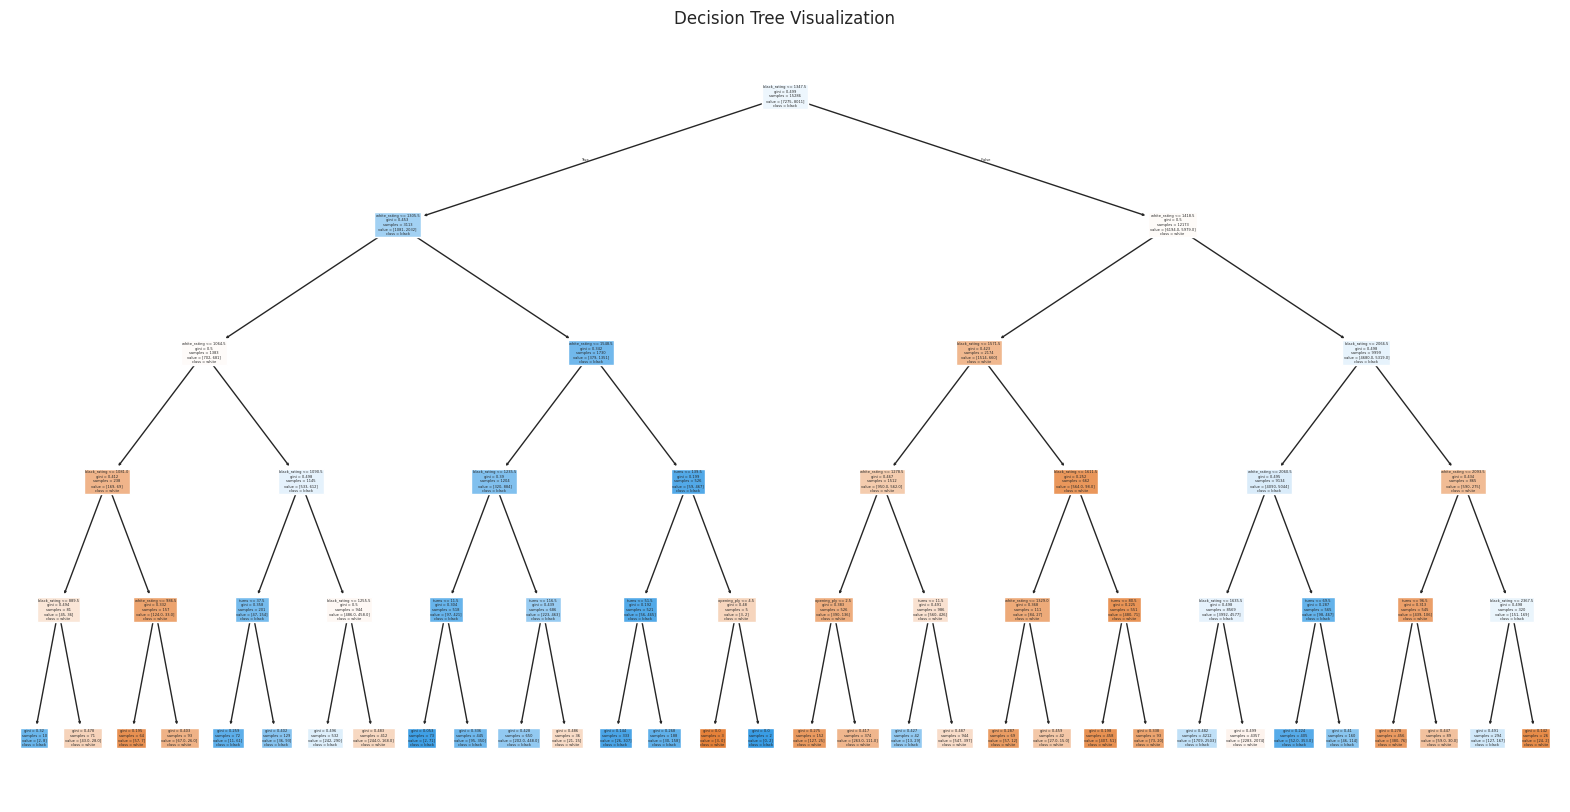

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['white', 'black'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [13]:
# Print the decision rules as plain text
tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)

|--- black_rating <= 1347.50
|   |--- white_rating <= 1305.50
|   |   |--- white_rating <= 1064.50
|   |   |   |--- black_rating <= 1081.00
|   |   |   |   |--- black_rating <= 889.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- black_rating >  889.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- black_rating >  1081.00
|   |   |   |   |--- white_rating <= 986.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- white_rating >  986.50
|   |   |   |   |   |--- class: 0
|   |   |--- white_rating >  1064.50
|   |   |   |--- black_rating <= 1090.50
|   |   |   |   |--- turns <= 37.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- turns >  37.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- black_rating >  1090.50
|   |   |   |   |--- black_rating <= 1255.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- black_rating >  1255.50
|   |   |   |   |   |--- class: 0
|   |--- white_rating >  1305.50
|   |   |--- white_rating <= 1548.50
|   |   |   |--- bla

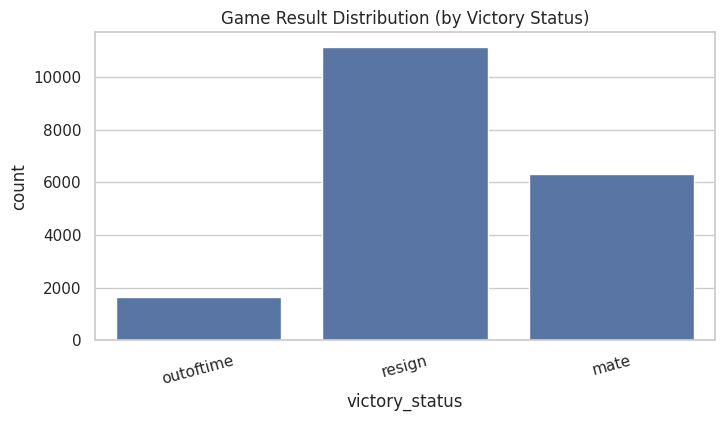

In [23]:

if 'victory_status' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='victory_status', data=df) # Use victory_status instead of result
    plt.title('Game Result Distribution (by Victory Status)')
    plt.xticks(rotation=15)
    plt.show()
else:
    print("The 'victory_status' column was not found in the DataFrame, skipping result distribution visualization.")